## importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## importing the datasets

In [2]:
df= pd.read_csv('supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df = df.drop(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Tax 5%', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'], axis=1)
df.head()



,Unit price,Quantity,Total,Date
0,74.69,7,548.9715,01-05-2019
1,15.28,5,80.2200,03-08-2019
2,46.33,7,340.5255,03-03-2019
3,58.22,8,489.0480,1/27/2019
4,86.31,7,634.3785,02-08-2019


In [4]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=False)

# Extract year, month, and day features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

,Unit price,Quantity,Total,Date,Year,Month,Day
0,74.69,7,548.9715,2019-01-05,2019,1,5
1,15.28,5,80.2200,2019-03-08,2019,3,8
2,46.33,7,340.5255,2019-03-03,2019,3,3
3,58.22,8,489.0480,2019-01-27,2019,1,27
4,86.31,7,634.3785,2019-02-08,2019,2,8


In [5]:
# Select features for the model
features = ['Year', 'Month', 'Day', 'Unit price', 'Quantity']
X = df[features]
y = df['Total']

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train the linear regression model

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

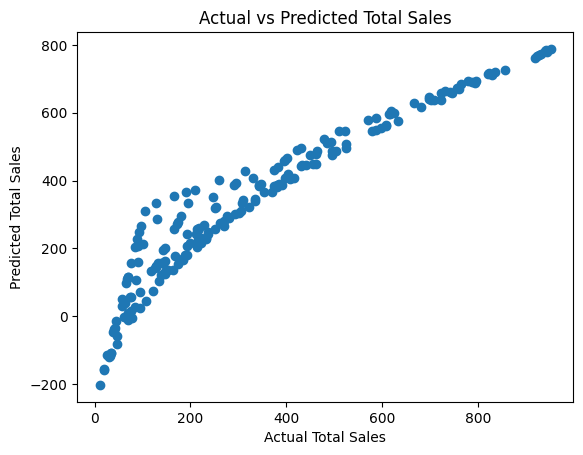

In [9]:
# Predict the total sales on the test data
y_pred = model.predict(X_test)
# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Total Sales')
plt.ylabel('Predicted Total Sales')
plt.title('Actual vs Predicted Total Sales')
plt.show()

In [10]:
# Evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 6232.1278754136365
R-squared: 0.904208068550793


In [11]:
# Create data for Q1 2025
q1_2025 = pd.DataFrame({
    'Year': [2025] * 90,
    'Month': [1] * 30 + [2] * 30 + [3] * 30,
    'Day': list(range(1, 31)) * 3,
    'Unit price': [df['Unit price'].mean()] * 90,
    'Quantity': [df['Quantity'].mean()] * 90
})

# Scale the data
q1_2025_scaled = scaler.transform(q1_2025)

# Make predictions
predictions = model.predict(q1_2025_scaled)

# Add predictions to the dataframe
q1_2025['Predicted_Sales'] = predictions

print(q1_2025)




    Year  Month  Day  Unit price  Quantity  Predicted_Sales
0   2025      1    1    55.67213      5.51       325.255545
1   2025      1    2    55.67213      5.51       324.974644
2   2025      1    3    55.67213      5.51       324.693742
3   2025      1    4    55.67213      5.51       324.412840
4   2025      1    5    55.67213      5.51       324.131938
..   ...    ...  ...         ...       ...              ...
85  2025      3   26    55.67213      5.51       318.824385
86  2025      3   27    55.67213      5.51       318.543483
87  2025      3   28    55.67213      5.51       318.262582
88  2025      3   29    55.67213      5.51       317.981680
89  2025      3   30    55.67213      5.51       317.700778

[90 rows x 6 columns]


In [12]:

print("Total predicted sales for Q1 2025: ${:.2f}".format(predictions.sum()))

Total predicted sales for Q1 2025: $28933.03
